<a href="https://colab.research.google.com/github/jidan-fikri/AWAN-App/blob/main/Klasifikasi_daun_sakit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [ ]:
import zipfile

!gdown 19_zNQBfXYV57RBfy2JbRGxVI4NPr5EpM
with zipfile.ZipFile('data_daun_melon.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

Downloading...
From: https://drive.google.com/uc?id=19_zNQBfXYV57RBfy2JbRGxVI4NPr5EpM
To: /content/data_daun_melon.zip
100% 109M/109M [00:02<00:00, 48.2MB/s]


Data preparation

In [ ]:
import os

# Directory with training pictures
train_dir = os.path.join('/content/data_daun_melon/train/') 
daun_sehat_dir = os.path.join('/content/data_daun_melon/train/daun_sehat')
daun_sakit_dir = os.path.join('/content/data_daun_melon/train/daun_sakit')

# Directory with validation pictures
val_dir = os.path.join('/content/data_daun_melon/val/') 

daun_sehat_names = os.listdir(daun_sehat_dir)
print(daun_sehat_names[:10])

daun_sakit_names = os.listdir(daun_sakit_dir)
print(daun_sakit_names[:10])


['Daun ke-11_20220822.jpg', 'Daun ke-29_20220822.jpg', 'Daun ke-8_20220822.jpg', 'Daun ke-12_20220822.jpg', 'Daun 20_4.jpg', 'Daun ke 18_20220815.jpg', 'Daun ke-7_20220822.jpg', 'Daun ke-3_20220822.jpg', 'Daun ke-2_20220822.jpg', 'Daun ke-25_20220822.jpg']
['TimePhoto_20220911_100520.jpg', 'TimePhoto_20220829_091916.jpg', 'TimePhoto_20220911_100001.jpg', 'TimePhoto_20220911_100305.jpg', 'TimePhoto_20220911_095830.jpg', 'TimePhoto_20220829_091927.jpg', 'TimePhoto_20220911_095702.jpg', 'TimePhoto_20220829_091958.jpg', 'TimePhoto_20220911_100632.jpg', 'TimePhoto_20220911_100552.jpg']


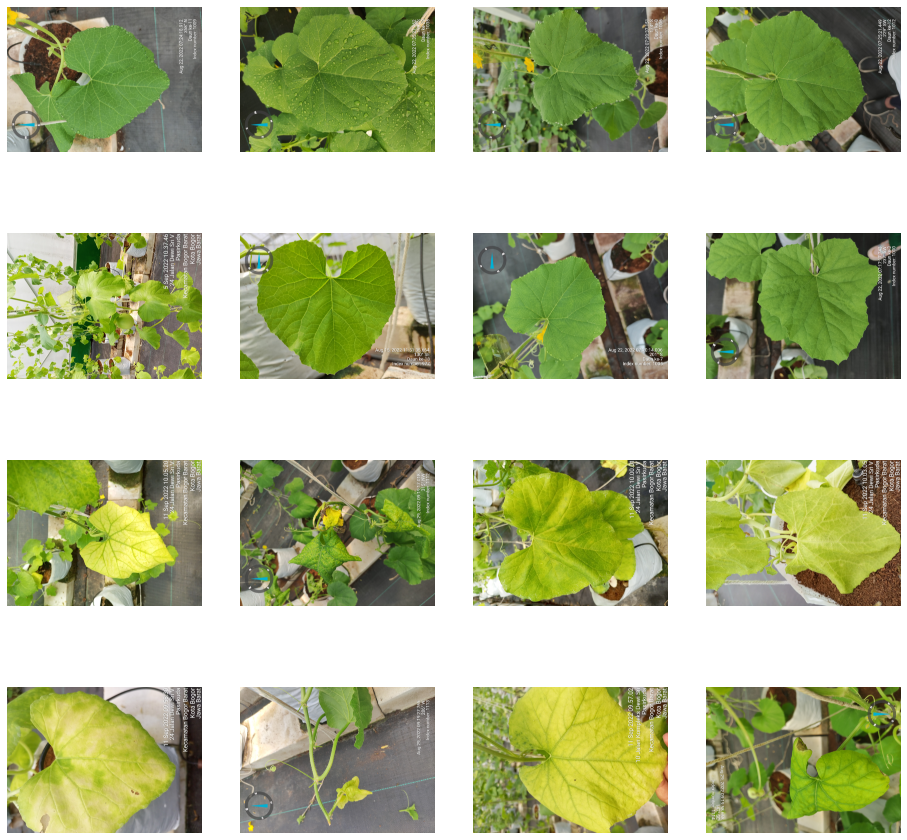

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for graph; output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(daun_sehat_dir, fname) 
                for fname in daun_sehat_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(daun_sakit_dir, fname) 
                for fname in daun_sakit_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

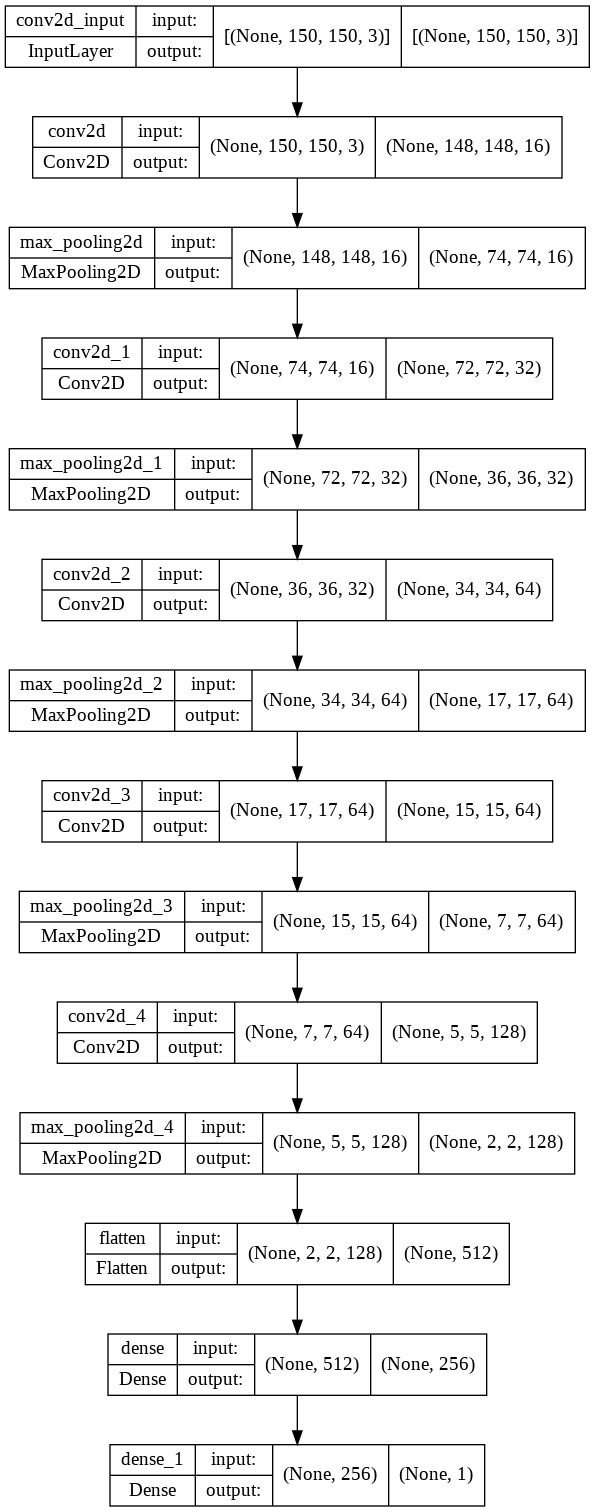

In [ ]:
#Visualizing NN layer
tf.keras.utils.plot_model(model, to_file = 'iterahero-cnn.png', show_shapes = True)

In [ ]:
# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 70,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 4,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     


validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 4,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 77 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = "/content/daun.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Constant for epochs
EPOCHS = 10

# Train the model
history = model.fit(
      train_generator,
      epochs=EPOCHS,
      callbacks = callbacks_list,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.2289 - accuracy: 0.9351
Epoch 1: val_accuracy improved from -inf to 0.26316, saving model to /content/daun.h5
20/20 [==============================] - 11s 531ms/step - loss: 0.2289 - accuracy: 0.9351 - val_loss: 1.6778 - val_accuracy: 0.2632
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9740
Epoch 2: val_accuracy improved from 0.26316 to 0.47368, saving model to /content/daun.h5
20/20 [==============================] - 11s 565ms/step - loss: 0.0607 - accuracy: 0.9740 - val_loss: 10.5303 - val_accuracy: 0.4737
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9481
Epoch 3: val_accuracy did not improve from 0.47368
20/20 [==============================] - 11s 536ms/step - loss: 0.2021 - accuracy: 0.9481 - val_loss: 3.2783 - val_accuracy: 0.0526
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9870
E

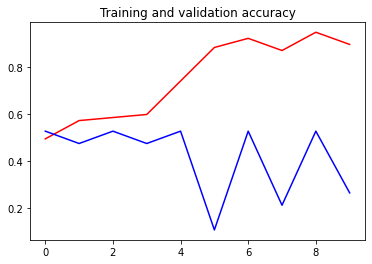

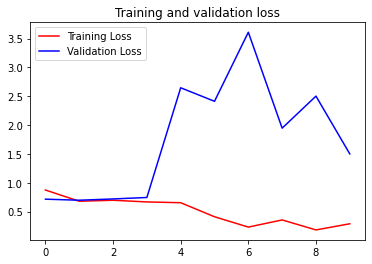

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


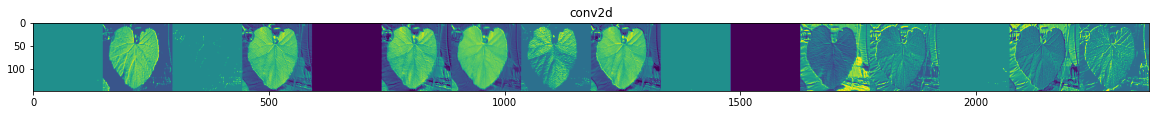

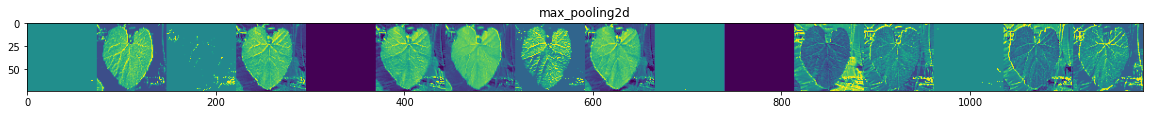

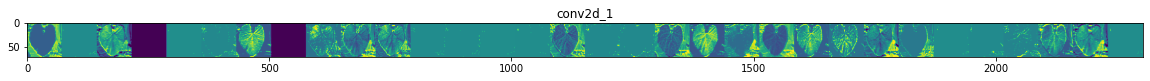

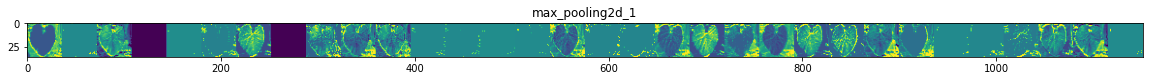

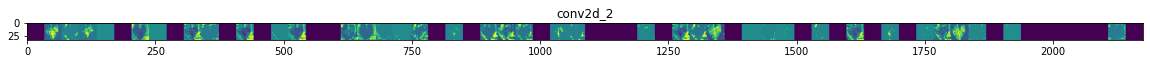

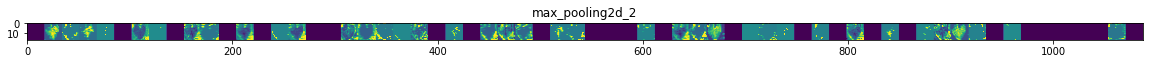

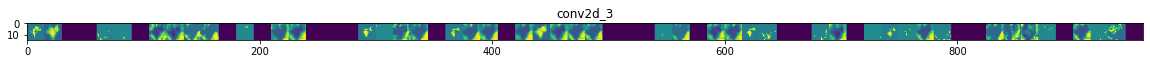

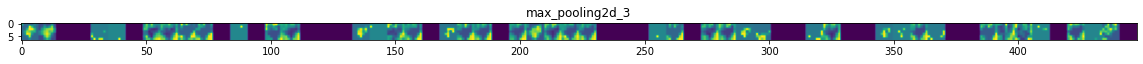

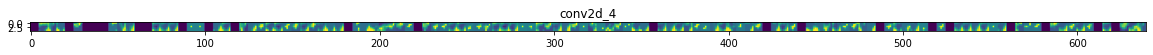

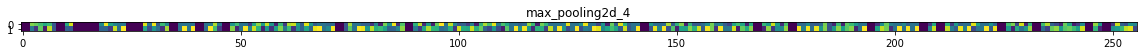

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(daun_sehat_dir, f) for f in daun_sehat_names]
dog_img_files = [os.path.join(daun_sakit_dir, f) for f in daun_sakit_names]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Trying with Transfer Learning

Using Inception V3  architecture for transfer learning.
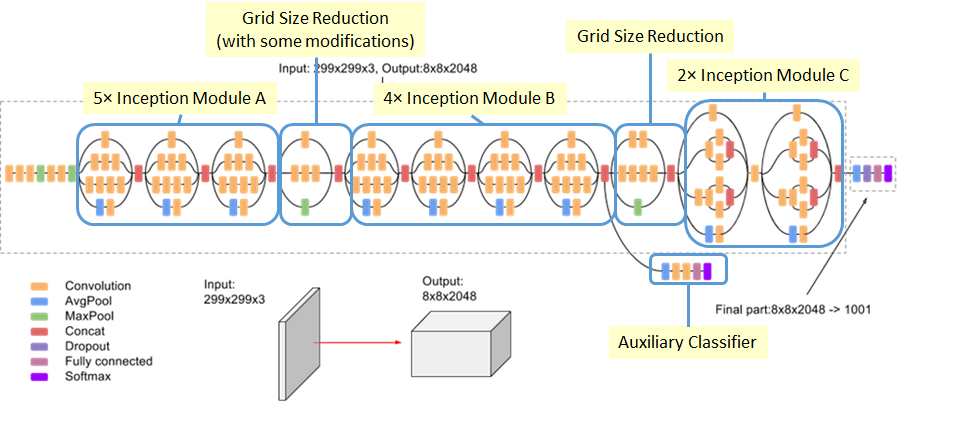



In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-09-12 14:22:21--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   213MB/s    in 0.4s    

2022-09-12 14:22:22 (213 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_15[0][0]']              
 alization)                                                                                       
                                                                                       

In [ ]:
# Choose `mixed_7` as the last layer of base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_15[0][0]']              
 alization)                                                                                       
                                                                                              

In [ ]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# Constant for epochs
EPOCHS = 10

# Train the model
history = model.fit(
      train_generator,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
20/20 [==============================] - 15s 592ms/step - loss: 0.8040 - accuracy: 0.6494 - val_loss: 1.1983 - val_accuracy: 0.3684
Epoch 2/10
20/20 [==============================] - 10s 504ms/step - loss: 0.3642 - accuracy: 0.8182 - val_loss: 1.4388 - val_accuracy: 0.3158
Epoch 3/10
20/20 [==============================] - 10s 504ms/step - loss: 0.3341 - accuracy: 0.8701 - val_loss: 1.3765 - val_accuracy: 0.3684
Epoch 4/10
20/20 [==============================] - 10s 505ms/step - loss: 0.2110 - accuracy: 0.9221 - val_loss: 1.7308 - val_accuracy: 0.2105
Epoch 5/10
20/20 [==============================] - 10s 508ms/step - loss: 0.2846 - accuracy: 0.9221 - val_loss: 1.7173 - val_accuracy: 0.3684
Epoch 6/10
20/20 [==============================] - 10s 504ms/step - loss: 0.2557 - accuracy: 0.8831 - val_loss: 2.3250 - val_accuracy: 0.3684
Epoch 7/10
20/20 [==============================] - 14s 706ms/step - loss: 0.1307 - accuracy: 0.9351 - val_loss: 1.7140 - val_accuracy: 0.4211

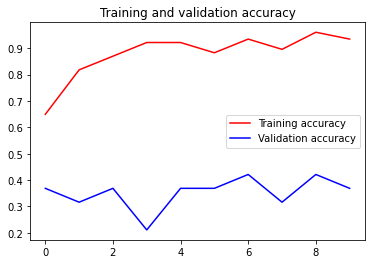

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

The result shows that the model didn't run well with the validation and training scores showing vast differences (overfitting) with both CNN and Transfer learning method.